# Data Analysis and Linear regression on Cardekho Data set

In [89]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

#importing the data csv file in pandas data frame
cars_df = pd.read_csv('D:\Machine Learning\Data sets\car data.csv')

print(cars_df.head(5))

  Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Seller_Type Transmission  Owner  
0      Dealer       Manual      0  
1      Dealer       Manual      0  
2      Dealer       Manual      0  
3      Dealer       Manual      0  
4      Dealer       Manual      0  


In [179]:
bike_df = cars_df[cars_df['Selling_Price'] < 1.75]

print(bike_df.head(5))

               Car_Name  Year  Selling_Price  Present_Price  Kms_Driven  \
37                  800  2003           0.35           2.28      127000   
44                 omni  2012           1.25           2.69       50000   
47              wagon r  2006           1.05           4.15       65000   
77              corolla  2004           1.50          12.35      135154   
101  UM Renegade Mojave  2017           1.70           1.82        1400   

    Fuel_Type Seller_Type Transmission  Owner  
37     Petrol  Individual       Manual      0  
44     Petrol      Dealer       Manual      0  
47     Petrol      Dealer       Manual      0  
77     Petrol      Dealer    Automatic      0  
101    Petrol  Individual       Manual      0  


   Selling_Price  Kms_Driven
0           3.35       27000
1           4.75       43000
2           7.25        6900
3           2.85        5200
4           4.60       42450


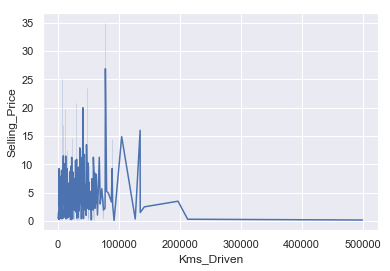

In [18]:
# Plotting the sellig price and Km_driven

car_line_df = pd.DataFrame(cars_df,columns=['Selling_Price','Kms_Driven'])
print(car_line_df.head(5))

sns.set(style='darkgrid')

sns.lineplot(x='Kms_Driven', y='Selling_Price', data = car_line_df)

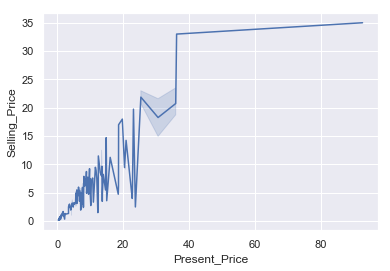

In [19]:
# Plotting the sellig price and Km_driven

car_line_df_price = pd.DataFrame(cars_df,columns=['Selling_Price','Present_Price'])

sns.lineplot(x='Present_Price', y='Selling_Price', data = car_line_df_price)

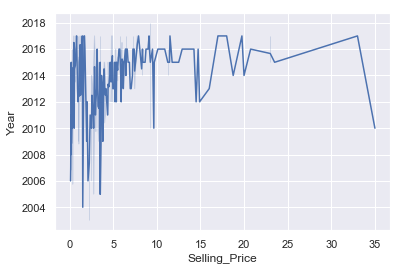

In [25]:
car_line_df_year = pd.DataFrame(cars_df,columns=['Selling_Price','Year'])

sns.lineplot(x='Selling_Price', y='Year', data = car_line_df_year)


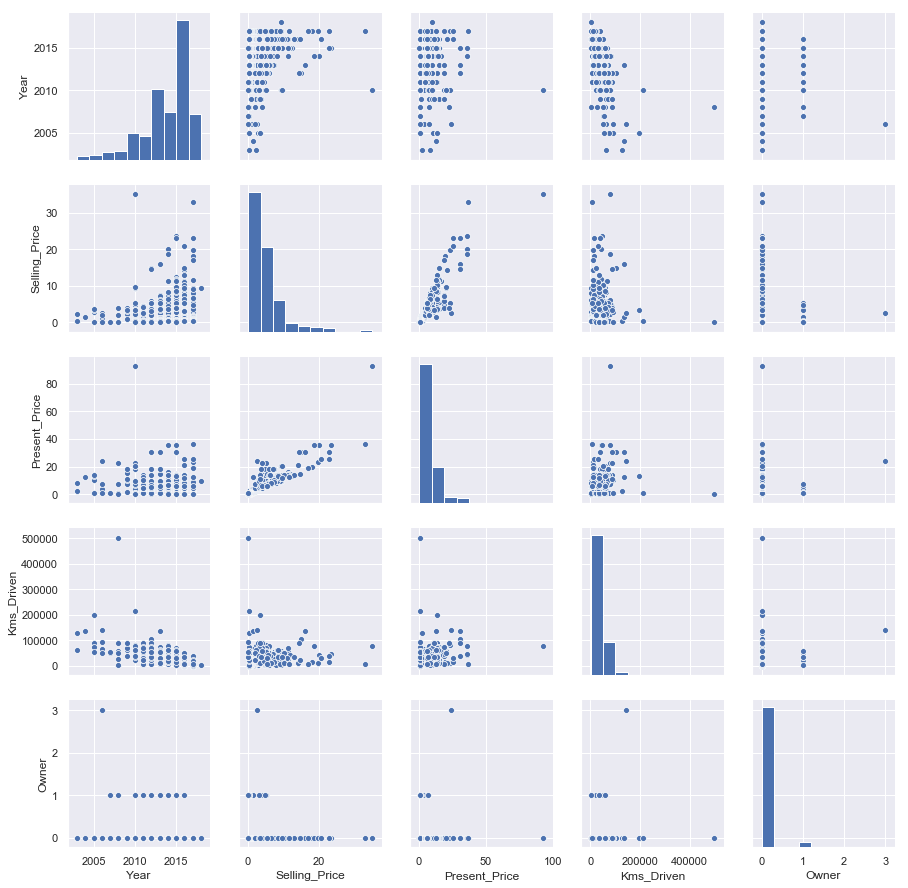

In [33]:
sns.pairplot(cars_df)

In [185]:
# Applying multiple Liner Regression 

X = pd.DataFrame(cars_df, columns=['Selling_Price','Present_Price','Kms_Driven'] )
Y = cars_df['Selling_Price']

In [62]:
# Standardize X and Y

Y = np.array((Y - Y.mean()) / Y.std())
X = X.apply(lambda rec : (rec - rec.mean()) / rec.std(), axis = 0)
print (X.head(5))


   Selling_Price  Present_Price  Kms_Driven
0      -0.257986      -0.235822   -0.255798
1       0.017452       0.221136    0.155651
2       0.509306       0.256999   -0.772682
3      -0.356357      -0.402409   -0.816399
4      -0.012059      -0.087744    0.141508


In [241]:
def initialize( dim ):
    # For reproducible results, the seed it set to 42.
    # Reader can comment the following two lines
    # and try other initialiazation values.
    np.random.seed(seed=45)
    random.seed(45)
    #Initialize the bias
    b = random.random()
    #Initialize the weights.
    w = np.random.rand( dim )
    return b, w

b, w = initialize( 3 )
print( "Bias: ", b, " Weights: ", w )

Bias:  0.2718754143840908  Weights:  [0.98901151 0.54954473 0.2814473 ]


In [242]:
# Inputs:
# b - bias
# w - weights
# X - the input matrix
def predict_Y( b, w, X ):
    return b + (X * w) 

b, w = initialize( 3 )
print( X.shape)
Y_hat = predict_Y( b, w, X)

Y_hat[0:10]

(301, 3)


,Selling_Price,Present_Price,Kms_Driven
0,3.585064,3.343830,7599.349028
1,4.969680,5.514532,12102.505859
2,7.442209,5.684891,1942.258259
3,3.090558,2.552486,1463.797846
4,4.821328,4.047248,11947.709843
5,9.420232,5.673900,583.149238
6,6.947703,4.734179,5290.355363
7,6.700450,5.003456,9408.773732
8,8.925726,5.157328,5706.053028
9,7.640011,5.173814,11924.349717


In [243]:
import math
# Inputs
# Y - Actual values of y
# Y_hat - predicted value of y
def get_cost( Y, Y_hat ):
    # Calculating the residuals from taking difference between actual and predicted values
    Y_resid =   Y_hat - Y[:,None]
    # Matrix multiplication with self will give the square values
    # Then takin the sum and dividing by number of examples to calculate mean
    
    return np.sum( Y_resid * Y_resid  )/ len( Y_resid )

b, w = initialize( 3 )
Y_hat = predict_Y( b, w, X)
print("Y hat: ",Y_hat.shape)
print("Y shape :",Y.shape)
get_cost(Y,Y_hat)

Y hat:  (301, 3)
Y shape : (301,)


Selling_Price    5.179768e-02
Present_Price    5.973602e+00
Kms_Driven       2.274248e+08
dtype: float64

In [244]:
def update_beta( x, y, y_hat, b_0, w_0, learning_rate ):
    #gradient of bias
        diff_y = np.subtract(y_hat , y[:,None])

        db = (np.sum( diff_y ) * 2) / len(y)
        #gradient of weights
      

        dw = ((np.dot( ( diff_y ), x.T )) * 2 ) / len(y)
        #update bias
        b_1 = b_0 - learning_rate * db
        #update beta
        w_0 = np.reshape(3,1)
        w_1 = w_0 - learning_rate  * dw 
        #return the new bias and beta values
        return b_1, w_1

b, w = initialize( 3 )
print( "After Initialization - Bias: ", b, " Weights: ", w )

Y_hat = predict_Y( b, w, X)

b, w = update_beta( X, Y, Y_hat, b, w, 0.01 )
print("b shape :", b.shape, "w shape :", w.shape)
print( "After first update - Bias: ", b, " Weights: ", w )

After Initialization - Bias:  0.2718754143840908  Weights:  [0.98901151 0.54954473 0.2814473 ]
b shape : (3,) w shape : (301, 301)
After first update - Bias:  Selling_Price      0.267462
Present_Price      0.275820
Kms_Driven      -207.614165
dtype: float64  Weights:  [[ -13624.37372189  -21699.85443657   -3479.55115867 ...  -44378.83250933
    -4539.45806511   -2754.77673751]
 [ -21700.61549606  -34562.01729534   -5543.48003679 ...  -70681.65600621
    -7231.53919059   -4389.16901603]
 [  -3468.44284953   -5525.594094      -884.14571187 ...  -11302.8471539
    -1154.14664297    -699.51673829]
 ...
 [ -44391.29623665  -70699.02745637  -11342.21079827 ... -144581.00013825
   -14795.10100458   -8981.09118402]
 [  -4521.15356365   -7202.13326296   -1153.17020016 ...  -14731.3323644
    -1505.04820766    -912.55329584]
 [  -2746.87301874   -4376.42731627    -699.7444185  ...   -8952.82793397
     -913.62322484    -553.49232103]]


In [251]:
def run_gradient_descent( X,Y,alpha = 0.01,num_iterations = 100):
    # Intialize the bias and weights
    b, w = initialize( X.shape[1] )
    
    iter_num = 0
    # gd_iterations_df keeps track of the cost every 10 iterations
    gd_iterations_df = pd.DataFrame(columns = ['iteration', 'cost'])
    result_idx = 0
    # Run the iterations in loop
    for each_iter in range(num_iterations):
        b, w = initialize( X.shape[1] )
        # Calcuated predicted value of y
        Y_hat = predict_Y( b, w, X )
     
        # Calculate the cost
        this_cost = get_cost( Y, Y_hat )
        # Save the previous bias and weights
        prev_b = b
        prev_w = w
        # Update and calculate the new values of bias and weights
        b, w = update_beta( X, Y, Y_hat, prev_b, prev_w, alpha)
       
        # For every 10 iterations, store the cost i.e. MSE
        if( iter_num % 10 == 0 ):
            gd_iterations_df.loc[result_idx] = [iter_num, this_cost]
            result_idx = result_idx + 1
        iter_num += 1
    print( "Final estimate of b and w: ", b,w)
    #return the final bias, weights and the cost at the end
    return gd_iterations_df, b, w

gd_iterations_df, b, w = run_gradient_descent( X, Y, alpha = 0.001, num_iterations = 200 )

Final estimate of b and w:  Selling_Price     0.271434
Present_Price     0.272270
Kms_Driven      -20.516729
dtype: float64 [[ -1359.73737219  -2167.28544366   -345.25511587 ...  -4435.18325093
    -451.24580651   -272.77767375]
 [ -2167.36154961  -3453.50172953   -551.64800368 ...  -7065.46560062
    -720.45391906   -436.2169016 ]
 [  -344.14428495   -549.8594094     -85.71457119 ...  -1127.58471539
    -112.7146643     -67.25167383]
 ...
 [ -4436.42962367  -7067.20274564  -1131.52107983 ... -14455.40001382
   -1476.81010046   -895.4091184 ]
 [  -449.41535637   -717.5133263    -112.61702002 ...  -1470.43323644
    -147.80482077    -88.55532958]
 [  -271.98730187   -434.94273163    -67.27444185 ...   -892.5827934
     -88.66232248    -52.6492321 ]]
